# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `species` using the other variables in the dataset.

**Dummify** all variables that require this.

In [1]:
pip install palmerpenguins

In [170]:
from palmerpenguins import load_penguins
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures,label_binarize
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
from plotnine import *
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,accuracy_score,confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,classification_report,roc_curve
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

In [3]:
penguins = load_penguins()
penguins= penguins.dropna()

In [4]:
penguins.head(1)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007


In [21]:
ct_combined = ColumnTransformer([('standardize', StandardScaler(), ['flipper_length_mm',"bill_length_mm", 'body_mass_g', 'year']),
    ('dummify', OneHotEncoder(sparse=False), ['island', 'sex'])
], remainder='drop')

Let's use the other variables to predict `species`. Prepare your data and fit the following models on the entire dataset:

* Two kNN models (for different values of K)
* Two decision tree models (for different complexities of trees)

Compute the following, for each of your models, on test data. Keep in mind that you may need to stratify your creation of the training and test data.

* Confusion matrix
* Overall Accuracy
* Precision, Recall, AUC, and F1-score for each species

Create one ROC plot for the species of your choice.

## Knn

### First Model

In [143]:
X = penguins.drop(['species'], axis=1)
y = penguins['species']

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [145]:
my_pipeline_knn = Pipeline([
    ("preprocessor", ct_combined),
    ("knn", KNeighborsClassifier(n_neighbors=5))  # kNN Classifier with k=5
])

# Fit the model on the training data
fitted_knn = my_pipeline_knn.fit(X_train, y_train)

# Predict on the test data
y_test_pred_knn1 = fitted_knn.predict(X_test)

### Confusion matrix

In [146]:
unique_classes = y.unique()
print(f"Unique classes in 'species':, {unique_classes} \n")

conf_matrix_test = confusion_matrix(y_test, y_test_pred_knn1)

# Assuming the classes are ['Adelie', 'Chinstrap', 'Gentoo']
class_names = unique_classes.tolist()

# Display the confusion matrix with class labels
conf_matrix_df = pd.DataFrame(conf_matrix_test, index=class_names, columns=class_names)
conf_matrix_df
# we have perfect accuracy

Unique classes in 'species':, ['Adelie' 'Gentoo' 'Chinstrap'] 



,Adelie,Gentoo,Chinstrap
Adelie,31,0,0
Gentoo,0,18,0
Chinstrap,0,0,18


In [151]:
recall_scores = classification_report(y_test, y_test_pred_knn1, output_dict=True)
recall_scores=pd.DataFrame(recall_scores)
recall_scores

,Adelie,Chinstrap,Gentoo,accuracy,macro avg,weighted avg
precision,1.0,1.0,1.0,1.0,1.0,1.0
recall,1.0,1.0,1.0,1.0,1.0,1.0
f1-score,1.0,1.0,1.0,1.0,1.0,1.0
support,31.0,18.0,18.0,1.0,67.0,67.0


### AUC

In [149]:
cv_scores_knn = cross_val_score(my_pipeline_knn, X, y, cv=5, scoring='roc_auc_ovr')
mean_cv_score_knn = np.mean(cv_scores_knn)
mean_cv_score_knn

0.9998496566725859

## 2nd Model

In [139]:
my_pipeline_knn1 = Pipeline([
    ("preprocessor", ct_combined),
    ("knn", KNeighborsClassifier(n_neighbors=50))  # kNN Classifier with k=5
])

# Fit the model on the training data
fitted_knn = my_pipeline_knn.fit(X_train, y_train)

# Predict on the training data
y_test_pred_knn = fitted_knn.predict(X_test)

# Construct the confusion matrix
conf_matrix_knn1 = confusion_matrix(y_test, y_train_pred_knn)


conf_matrix_knn1

array([[31,  0,  0],
       [ 2, 16,  0],
       [ 0,  0, 18]])

In [140]:
unique_classes = y.unique()
print(f"Unique classes in 'species':, {unique_classes} \n")

conf_matrix_test = confusion_matrix(y_test, y_train_pred_knn)

# Assuming the classes are ['Adelie', 'Chinstrap', 'Gentoo']
class_names = unique_classes.tolist()

# Display the confusion matrix with class labels
conf_matrix_df2 = pd.DataFrame(conf_matrix_test, index=class_names, columns=class_names)
conf_matrix_df2
# adelie is being misclassfied at gentoo


Unique classes in 'species':, ['Adelie' 'Gentoo' 'Chinstrap'] 



,Adelie,Gentoo,Chinstrap
Adelie,31,0,0
Gentoo,2,16,0
Chinstrap,0,0,18


In [142]:
recall_scores = classification_report(y_test, y_test_pred_knn, output_dict=True)
recall_scores = pd.DataFrame(recall_scores)
recall_scores

,Adelie,Chinstrap,Gentoo,accuracy,macro avg,weighted avg
precision,0.939394,1.000000,1.0,0.970149,0.979798,0.971958
recall,1.000000,0.888889,1.0,0.970149,0.962963,0.970149
f1-score,0.968750,0.941176,1.0,0.970149,0.969975,0.969738
support,31.000000,18.000000,18.0,0.970149,67.000000,67.000000


### AUC

In [120]:
cv_scores_knn = cross_val_score(my_pipeline_knn, X, y, cv=5, scoring='roc_auc_ovr')
mean_cv_score_knn = np.mean(cv_scores_knn)
mean_cv_score_knn

0.9990388806777535

## Descion tree

## Model 1

In [121]:
# Decision Tree with lower complexity (e.g., max_depth=3)
my_pipeline_dt_simple = Pipeline([
    ("preprocessor", ct_combined),
    ("decision_tree", DecisionTreeClassifier(max_depth=3, random_state=42))
])

# Fit the simpler model on the training data
fitted_dt_simple = my_pipeline_dt_simple.fit(X_train, y_train)

# Predict on the test data using the simpler model
y_test_pred_dt_simple = fitted_dt_simple.predict(X_test)

# Construct the confusion matrix for the simpler model
conf_matrix_dt_simple = confusion_matrix(y_test, y_test_pred_dt_simple)


In [122]:
unique_classes = y.unique()
print(f"Unique classes in 'species':, {unique_classes} \n")

conf_matrix_test = confusion_matrix(y_test, y_test_pred_dt_simple)

# Assuming the classes are ['Adelie', 'Chinstrap', 'Gentoo']
class_names = unique_classes.tolist()

# Display the confusion matrix with class labels
conf_matrix_df = pd.DataFrame(conf_matrix_test, index=class_names, columns=class_names)
conf_matrix_df

Unique classes in 'species':, ['Adelie' 'Gentoo' 'Chinstrap'] 



,Adelie,Gentoo,Chinstrap
Adelie,31,0,0
Gentoo,2,16,0
Chinstrap,0,0,18


In [123]:
# Calculate training accuracy using cross-validation
cv_scores_knn = cross_val_score(my_pipeline_dt_simple, X, y, cv=5, scoring='accuracy')
mean_cv_score_knn = np.mean(cv_scores_knn)
mean_cv_score_knn

0.9699683401175939

In [152]:
recall_scores = classification_report(y_test, y_test_pred_dt_simple , output_dict=True)
recall_scores = pd.DataFrame(recall_scores)
recall_scores

,Adelie,Chinstrap,Gentoo,accuracy,macro avg,weighted avg
precision,0.939394,1.000000,1.0,0.970149,0.979798,0.971958
recall,1.000000,0.888889,1.0,0.970149,0.962963,0.970149
f1-score,0.968750,0.941176,1.0,0.970149,0.969975,0.969738
support,31.000000,18.000000,18.0,0.970149,67.000000,67.000000


### AUC

In [128]:
cv_scores_knn = cross_val_score(my_pipeline_dt_simple, X, y, cv=5, scoring='roc_auc_ovr')
mean_cv_score_knn = np.mean(cv_scores_knn)
mean_cv_score_knn

0.9900385436130907

## Model 2

In [188]:
# Decision Tree with higher complexity (e.g., max_depth=10)
my_pipeline_dt_complex = Pipeline([
    ("preprocessor", ct_combined),
    ("decision_tree", DecisionTreeClassifier(max_depth=70, random_state=42))
])

# Fit the more complex model on the training data
fitted_dt_complex = my_pipeline_dt_complex.fit(X_train, y_train)

# Predict on the test data using the more complex model
y_test_pred_dt_complex = fitted_dt_complex.predict(X_test)

# Construct the confusion matrix for the more complex model
conf_matrix_dt_complex = confusion_matrix(y_test, y_test_pred_dt_complex)

conf_matrix_dt_complex

array([[30,  1,  0],
       [ 0, 18,  0],
       [ 0,  0, 18]])

In [189]:
unique_classes = y.unique()
print(f"Unique classes in 'species':, {unique_classes} \n")

conf_matrix_test = confusion_matrix(y_test, y_test_pred_dt_complex)

# Assuming the classes are ['Adelie', 'Chinstrap', 'Gentoo']
class_names = unique_classes.tolist()

# Display the confusion matrix with class labels
conf_matrix_df = pd.DataFrame(conf_matrix_test, index=class_names, columns=class_names)
conf_matrix_df

Unique classes in 'species':, ['Adelie' 'Gentoo' 'Chinstrap'] 



,Adelie,Gentoo,Chinstrap
Adelie,30,1,0
Gentoo,0,18,0
Chinstrap,0,0,18


The diagonal elements (30, 18, 18) represent the number of correct predictions, while the off-diagonal elements represent the number of incorrect predictions.

In [190]:
recall_scores = classification_report(y_test, y_test_pred_dt_complex , output_dict=True)
recall_scores = pd.DataFrame(recall_scores)
recall_scores

,Adelie,Chinstrap,Gentoo,accuracy,macro avg,weighted avg
precision,1.000000,0.947368,1.0,0.985075,0.982456,0.985860
recall,0.967742,1.000000,1.0,0.985075,0.989247,0.985075
f1-score,0.983607,0.972973,1.0,0.985075,0.985527,0.985154
support,31.000000,18.000000,18.0,0.985075,67.000000,67.000000


### AUC

Method 1

In [181]:
prob = my_pipeline_dt_complex.predict_proba(X_test)
roc_auc_score(y_test, prob, multi_class='ovr')

0.9912222953697608

Method 2

In [182]:
cv_scores_knn = cross_val_score(my_pipeline_dt_complex, X, y, cv=5, scoring='roc_auc_ovr')
mean_cv_score_knn = np.mean(cv_scores_knn)
mean_cv_score_knn

0.9851044385700927

# Plot for ROC

Precision is about being correct when you make a prediction.
Recall is about finding all the positives there are to find.

In [191]:
class_names= ["Adelie", "Chinstrap", "Gentoo"]
# Binarize y_test for 'Gentoo' class
y_test_binarized_gentoo = label_binarize(y_test, classes=class_names)[:, class_names.index('Gentoo')]

# Predict probabilities for the 'Gentoo' class
y_test_pred_proba_gentoo = fitted_dt_complex.predict_proba(X_test)[:, class_names.index('Gentoo')]


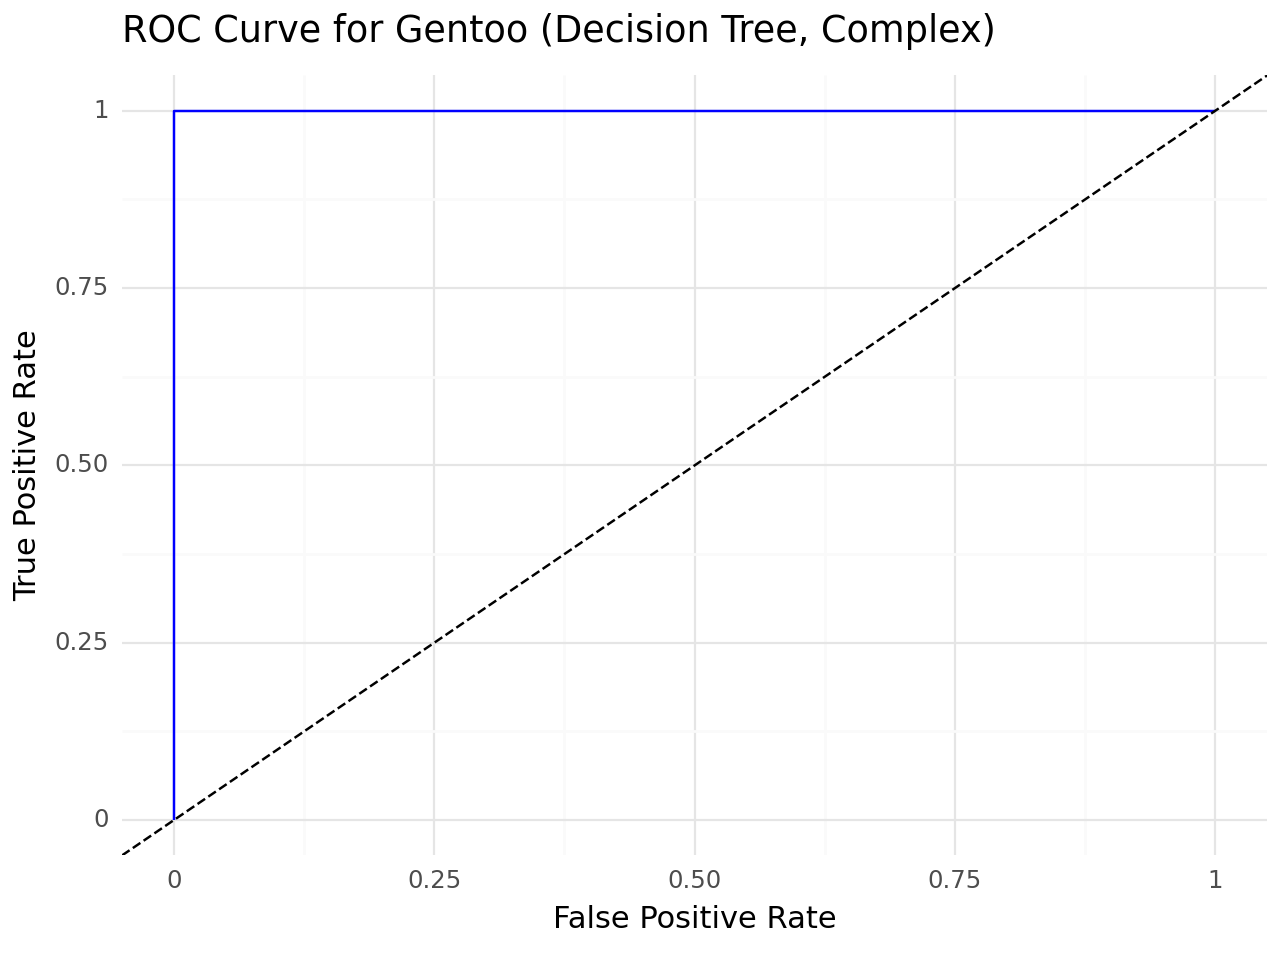

<Figure Size: (640 x 480)>

In [194]:
# Calculate ROC curve metrics for 'Gentoo' class
fpr_gentoo, tpr_gentoo, thresholds_gentoo = roc_curve(y_test_binarized_gentoo, y_test_pred_proba_gentoo)

# Convert to DataFrame for plotting
roc_data_gentoo = pd.DataFrame({
    'False Positive Rate': fpr_gentoo,
    'True Positive Rate': tpr_gentoo
})

# Create ROC plot using plotnine
roc_plot_gentoo = (
    ggplot(roc_data_gentoo, aes(x='False Positive Rate', y='True Positive Rate'))
    + geom_line(color= "blue")
    + geom_abline(linetype='dashed')
    + labs(title='ROC Curve for Gentoo (Decision Tree, Complex)', x='False Positive Rate', y='True Positive Rate')
    + theme_minimal()
)

roc_plot_gentoo